In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import norm
from scipy.stats import linregress
from tqdm import tqdm

In [24]:
outpath= "/oak/stanford/groups/horence/JuliaO/visium_analysis/notebooks/output/ge_variance/"

In [25]:
# dataname = "V1_Mouse_Brain_Sagittal_Posterior_Section_2"
dataname = "V1_Mouse_Brain_Sagittal_Posterior"

# dataname = "V1_Mouse_Brain_Sagittal_Anterior_Section_2"
# dataname = "V1_Mouse_Brain_Sagittal_Anterior"
# dataname = "V1_Mouse_Kidney"
# dataname = "cta_ucsf-1-5_liver"
# dataname = "p20218-s001_L1"
samples = pd.read_csv("output/make_samplesheet/spatial.csv",index_col = 0)
# samples
row = samples.loc[dataname]

score = "ReadZS_norm"
score2 = "ReadZS_ge_norm"

thresh = 1000

# score = "SpliZ_norm"
# score2 = "ge_norm"
thresh = 100

scores = pd.read_csv("output/make_samplesheet/scores.csv",index_col=0)
srow = scores.loc[score]
srow2 = scores.loc[score2]

In [26]:
df = pd.read_csv(row[srow["valname"]],sep="\t")
df2 = pd.read_csv(row[srow2["valname"]],sep="\t")

In [27]:
df["num_spots"] = df[srow["genecol"]].map(df.groupby(srow["genecol"])[srow["cellid"]].nunique())
df = df[df["num_spots"] > thresh]

In [28]:
df["gene_cell"] = df[srow["genecol"]] + "_" + df[srow["cellid"]]
df2["gene_cell"] = df2[srow2["genecol"]] + "_" + df2[srow2["cellid"]]

In [29]:
df[srow2["col"]] = df["gene_cell"].map({x : y for x, y in zip(df2["gene_cell"],df2[srow2["col"]])})

In [30]:
df = df[(~(df[srow["col"]].isna())) & (~(df[srow2["col"]].isna()))]

In [45]:
q = 10
cols = [srow["col"],srow2["col"]]
out = {srow["genecol"] : [], "num_spots" : [], "r_squared" : []}

for window, windf in tqdm(df.groupby(srow["genecol"])):
#   if window == "chr8_11013_plus":
  for col in cols:
    qval = q
    # quantile
#     windf["{}_quant".format(col)] = pd.qcut(windf[col],qval,labels=False)
    while True:
      try:
        windf["{}_quant".format(col)] = pd.qcut(windf[col],qval,labels=False)

        break
      except:
        qval -= 1
#         print(qval)
    # inverse cdf to normal
    windf["{}_norm".format(col)] = norm.ppf((windf["{}_quant".format(col)] + 0.5)/(windf["{}_quant".format(col)].max() + 1))
  result = linregress(windf["{}_norm".format(srow["col"])], windf["{}_norm".format(srow2["col"])])
  out[srow["genecol"]].append(window)
  out["num_spots"].append(windf[srow["cellid"]].nunique())
  out["r_squared"].append(result.rvalue**2)

pd.DataFrame.from_dict(out)

 86%|████████▌ | 4287/4996 [00:02<00:00, 1789.14it/s]


window  num_spots  r_squared
0  chr8_11013_plus       2951   0.223076

In [31]:
graydf = df.drop_duplicates(srow["cellid"])
thresh = 5
xcol = "plot_xcoord"
ycol = "plot_ycoord"
alpha = 0.2

/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


/oak/stanford/groups/horence/JuliaO/visium_analysis/notebooks/output/ge_variance/V1_Mouse_Brain_Sagittal_Posterior_chr11_10721_plus.png


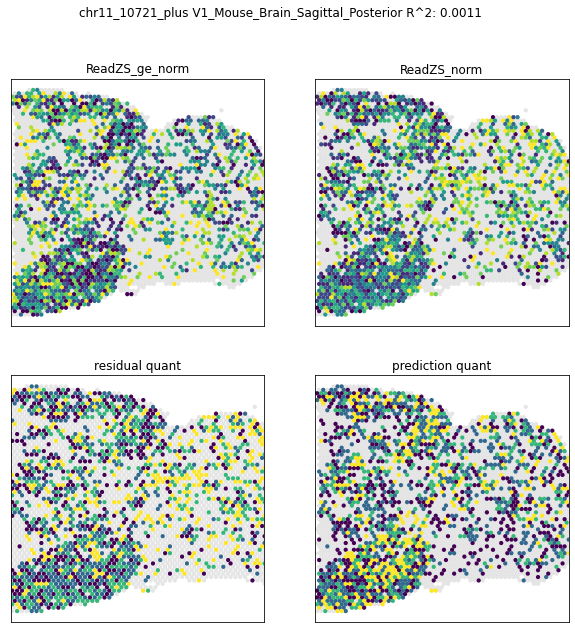

/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


/oak/stanford/groups/horence/JuliaO/visium_analysis/notebooks/output/ge_variance/V1_Mouse_Brain_Sagittal_Posterior_chr4_12711_plus.png


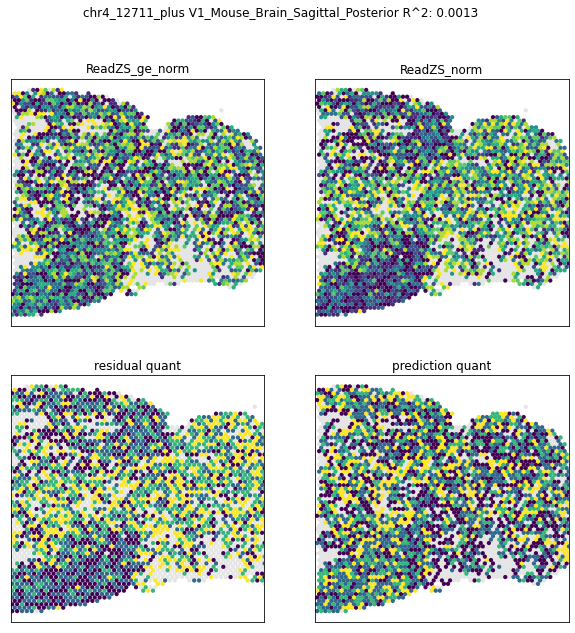

/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


/oak/stanford/groups/horence/JuliaO/visium_analysis/notebooks/output/ge_variance/V1_Mouse_Brain_Sagittal_Posterior_chr4_27642_plus.png


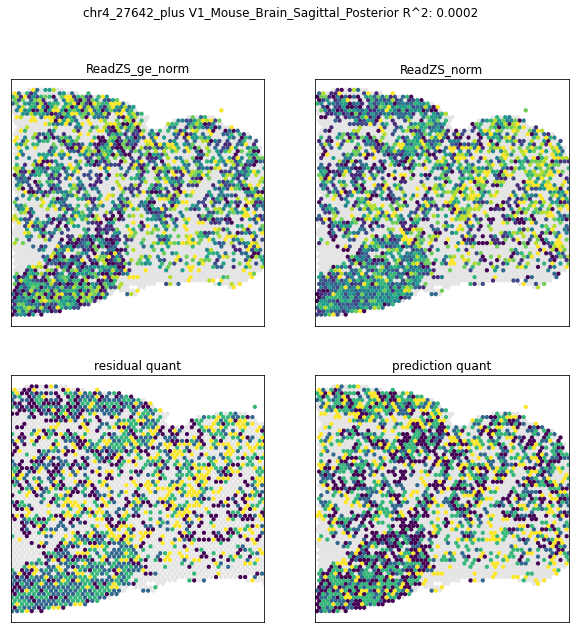

/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


/oak/stanford/groups/horence/JuliaO/visium_analysis/notebooks/output/ge_variance/V1_Mouse_Brain_Sagittal_Posterior_chr7_28286_minus.png


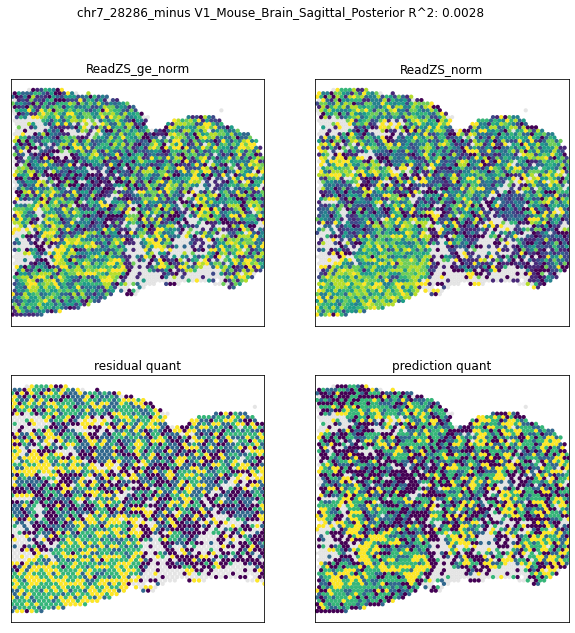

/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


/oak/stanford/groups/horence/JuliaO/visium_analysis/notebooks/output/ge_variance/V1_Mouse_Brain_Sagittal_Posterior_chr9_13405_minus.png


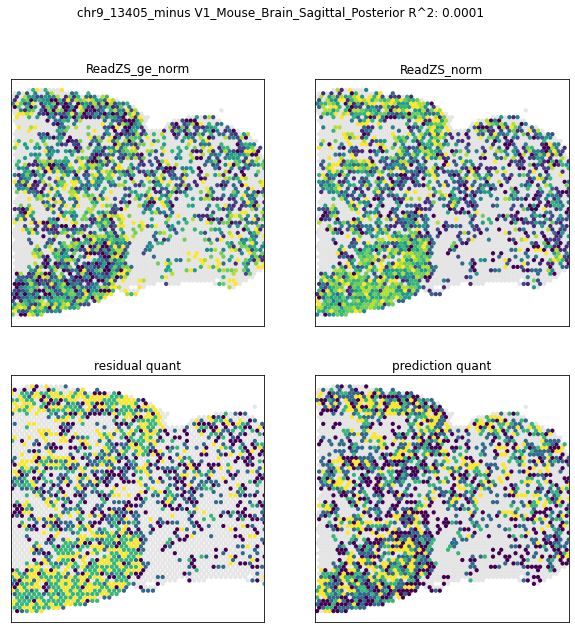

/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


/oak/stanford/groups/horence/JuliaO/visium_analysis/notebooks/output/ge_variance/V1_Mouse_Brain_Sagittal_Posterior_chr17_16275_minus.png


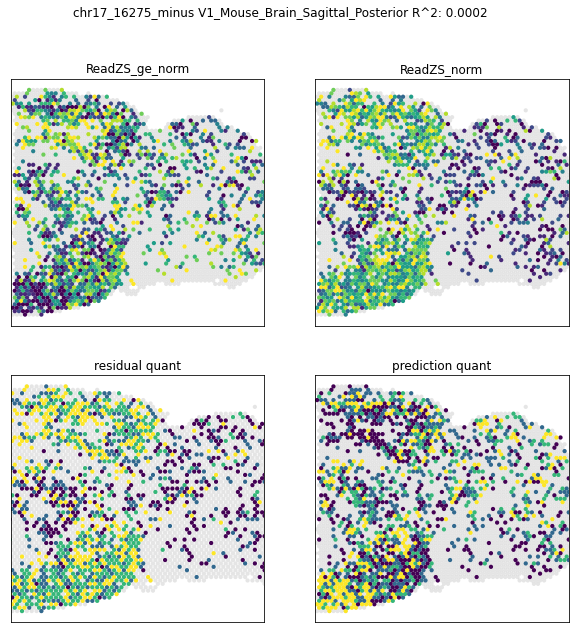

In [32]:
# window = "chr8_11013_plus"
# window = "chr11_10983_plus"
# window = "chr10_16012_plus"
# window = "chr4_28196_plus"
# window = "chr19_1997_plus"
# window = "Rps24"

rev = False
q = 10
cols = [srow["col"],srow2["col"]]
# window = "Myl6"
# window = "Gng13"

# for window in ["Myl6"]:#,"Rps24","Gng13","Ptgds","Gas5","Gm1673","Paxx","Zcrb1"]:
# for window in ['chr11_10983_minus','chr6_26770_minus', 'chr14_10848_minus', 'chr6_28499_minus', 'chr9_15696_minus', 'chr7_20763_minus', 'chr15_14999_minus',]:
for window in ['chr11_10721_plus',
 'chr4_12711_plus',
 'chr4_27642_plus',
 'chr7_28286_minus',
 'chr9_13405_minus',
 'chr17_16275_minus']:
# for window in ['chrX_7360_plus', 'chr15_15382_plus', 'chr9_9083_plus', 'chr11_6460_plus', 'chr8_24135_plus', 'chr9_21669_plus', 'chr19_1997_plus', 'chr7_8692_plus', 'chr10_16012_plus', 'chr11_10983_plus', 'chr7_8846_plus', 'chr18_15557_plus', 'chr10_8717_plus']:
  # for window in ["Myl6","Rps24","Ptgds","Bag6","Hras"]:
# for window in ["Paxx","Rps24","Mrpl13","Mcee","Myl6","Fxyd2","Cox7c"]:
# for window in ['chr6_28499_minus',
#  'chr15_15382_plus',
#  'chr7_8846_plus',
#  'chr10_16012_plus',
#  'chr9_15696_minus',
#  'chr18_15557_plus',
#  'chr7_8692_plus',
#  'chr11_10983_minus',
#  'chrX_7360_plus',
#  'chr8_24135_plus',
#  'chr10_8717_plus',
#  'chr14_10848_minus',
#  'chr7_20763_minus',
#  'chr9_21669_plus',
#  'chr15_14999_minus',
#  'chr19_1997_plus',
#  'chr5_28581_minus',
#  'chr9_9083_plus',
#  'chr6_26770_minus',
#  'chr11_6460_plus',
#  'chr11_10983_plus']:
  windf = df[df[srow["genecol"]] == window]

  if rev:
    windf[srow["col"]] = -windf[srow["col"]]
  for col in cols:
    qval = q
    # quantile
  #     windf["{}_quant".format(col)] = pd.qcut(windf[col],qval,labels=False)
    while True:
      try:
        windf["{}_quant".format(col)] = pd.qcut(windf[col],qval,labels=False)

        break
      except:
        qval -= 1
  #         print(qval)
    # inverse cdf to normal
    windf["{}_norm".format(col)] = norm.ppf((windf["{}_quant".format(col)] + 0.5)/(windf["{}_quant".format(col)].max() + 1))
  result = linregress(windf["{}_norm".format(srow2["col"])], windf["{}_norm".format(srow["col"])])
  windf["predict"] = result.intercept + result.slope*windf["{}_norm".format(srow2["col"])]
  windf["res"] = windf["{}_norm".format(srow["col"])] - windf["predict"]


  for col in ["predict","res"]:
    windf[col + "_quant"] = 1

    windf.loc[windf[col] > windf[col].quantile(.25),col + "_quant"] = 2
    windf.loc[windf[col] > windf[col].quantile(.5),col + "_quant"] = 3
    windf.loc[windf[col] > windf[col].quantile(.75),col + "_quant"] = 4
  # out[srow["genecol"]].append(window)
  # out["num_spots"].append(windf[srow["cellid"]].nunique())
  # out["r_squared"].append(result.rvalue**2)


  fig, axs = plt.subplots(2,2, figsize=(10,10))
  palette0 = "viridis"
  palette1 = "viridis"
  palette2 = "viridis"
  legval = False
  # instead of this, have quant for other
  #     sns.scatterplot(ax=axs[1],data = graydf, x=xcol, y = ycol,color="gray",alpha = alpha,size=3,linewidth=0,legend=False)
  #     sns.scatterplot(ax=axs[1],data = gene_df, x = xcol, y = ycol, hue = srow["col"],size=3,linewidth=0,palette="viridis",legend=legval)

  sns.scatterplot(ax=axs[0,0],data = graydf, x=xcol, y = ycol,color="gray",alpha = alpha,size=3,linewidth=0,legend=False)
  sns.scatterplot(ax=axs[0,0],data = windf, x = xcol, y = ycol, hue = srow2["col"] + "_quant",size=3,linewidth=0,palette=palette0,legend=False)
  axs[0,0].set(xlabel=None)
  axs[0,0].set(ylabel=None)      
  axs[0,0].axes.xaxis.set_visible(False)
  axs[0,0].axes.yaxis.set_visible(False)
  axs[0,1].axes.xaxis.set_visible(False)
  axs[0,1].axes.yaxis.set_visible(False)
  axs[1,0].axes.xaxis.set_visible(False)
  axs[1,0].axes.yaxis.set_visible(False)
  axs[1,1].axes.xaxis.set_visible(False)
  axs[1,1].axes.yaxis.set_visible(False)
  sns.scatterplot(ax=axs[0,1],data = graydf, x=xcol, y = ycol,color="gray",alpha = alpha,size=3,linewidth=0,legend=False)
  sns.scatterplot(ax=axs[0,1],data = windf, x = xcol, y = ycol, hue = srow["col"] + "_quant",size=3,linewidth=0,palette=palette1,legend=False)    
  axs[0,1].set(xlabel=None)
  axs[0,1].set(ylabel=None) 

  sns.scatterplot(ax=axs[1,1],data = graydf, x=xcol, y = ycol,color="gray",alpha = alpha,size=3,linewidth=0,legend=False)
  sns.scatterplot(ax=axs[1,1],data = windf, x = xcol, y = ycol, hue = "predict_quant",size=3,linewidth=0,palette=palette2,legend=False)    
  axs[1,1].set(xlabel=None)
  axs[1,1].set(ylabel=None) 

  sns.scatterplot(ax=axs[1,0],data = graydf, x=xcol, y = ycol,color="gray",alpha = alpha,size=3,linewidth=0,legend=False)
  sns.scatterplot(ax=axs[1,0],data = windf, x = xcol, y = ycol, hue = "res_quant",size=3,linewidth=0,palette=palette2,legend=legval)    
  axs[1,0].set(xlabel=None)
  axs[1,0].set(ylabel=None) 

  for i in range(2):
    for j in range(2):
      axs[i,j].set_xlim([df2["plot_xcoord"].min(),df2["plot_xcoord"].max()])
  axs[1,0].set_xlim((1800,9000))
  axs[0,0].set_title(score2)
  axs[0,1].set_title(score)
  axs[1,0].set_title("residual quant")
  axs[1,1].set_title("prediction quant")
  fig.suptitle("{} {} R^2: {:0.4f}".format(window,dataname,result.rvalue**2))
  plt.savefig("{}{}_{}.png".format(outpath,dataname,window))
  print("{}{}_{}.png".format(outpath,dataname,window))
  plt.show()

/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


/oak/stanford/groups/horence/JuliaO/visium_analysis/notebooks/output/ge_variance/V1_Mouse_Kidney_Rps24.png


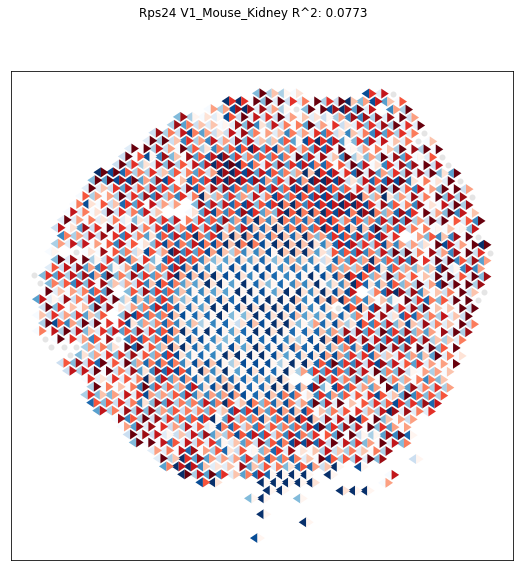

In [56]:
# window = "chr8_11013_plus"
# window = "chr11_10983_plus"
# window = "chr10_16012_plus"
# window = "chr4_28196_plus"
# window = "chr19_1997_plus"
# window = "Rps24"

rev = False
q = 10
cols = [srow["col"],srow2["col"]]
# window = "Myl6"
# window = "Gng13"
s = 100
# for window in ["Myl6"]:#,"Rps24","Gng13","Ptgds","Gas5","Gm1673","Paxx","Zcrb1"]:
for window in ['Rps24']:
# for window in ["Myl6","Rps24","Ptgds","Bag6","Hras"]:
# for window in ["Paxx","Rps24","Mrpl13","Mcee","Myl6","Fxyd2","Cox7c"]:
# for window in ['chr6_28499_minus',
#  'chr15_15382_plus',
#  'chr7_8846_plus',
#  'chr10_16012_plus',
#  'chr9_15696_minus',
#  'chr18_15557_plus',
#  'chr7_8692_plus',
#  'chr11_10983_minus',
#  'chrX_7360_plus',
#  'chr8_24135_plus',
#  'chr10_8717_plus',
#  'chr14_10848_minus',
#  'chr7_20763_minus',
#  'chr9_21669_plus',
#  'chr15_14999_minus',
#  'chr19_1997_plus',
#  'chr5_28581_minus',
#  'chr9_9083_plus',
#  'chr6_26770_minus',
#  'chr11_6460_plus',
#  'chr11_10983_plus']:
  windf = df[df[srow["genecol"]] == window]

  if rev:
    windf[srow["col"]] = -windf[srow["col"]]
  for col in cols:
    qval = q
    # quantile
  #     windf["{}_quant".format(col)] = pd.qcut(windf[col],qval,labels=False)
    while True:
      try:
        windf["{}_quant".format(col)] = pd.qcut(windf[col],qval,labels=False)

        break
      except:
        qval -= 1
  #         print(qval)
    # inverse cdf to normal
    windf["{}_norm".format(col)] = norm.ppf((windf["{}_quant".format(col)] + 0.5)/(windf["{}_quant".format(col)].max() + 1))
  result = linregress(windf["{}_norm".format(srow2["col"])], windf["{}_norm".format(srow["col"])])
  windf["predict"] = result.intercept + result.slope*windf["{}_norm".format(srow2["col"])]
  windf["res"] = windf["{}_norm".format(srow["col"])] - windf["predict"]


  for col in ["predict","res"]:
    windf[col + "_quant"] = 1

    windf.loc[windf[col] > windf[col].quantile(.25),col + "_quant"] = 2
    windf.loc[windf[col] > windf[col].quantile(.5),col + "_quant"] = 3
    windf.loc[windf[col] > windf[col].quantile(.75),col + "_quant"] = 4
  # out[srow["genecol"]].append(window)
  # out["num_spots"].append(windf[srow["cellid"]].nunique())
  # out["r_squared"].append(result.rvalue**2)


  fig, axs = plt.subplots(1,1, figsize=(9,9))
  palette0 = "Blues"
  palette1 = "Reds"
  palette2 = "viridis"
  legval = False
  # instead of this, have quant for other
  #     sns.scatterplot(ax=axs[1],data = graydf, x=xcol, y = ycol,color="gray",alpha = alpha,size=3,linewidth=0,legend=False)
  #     sns.scatterplot(ax=axs[1],data = gene_df, x = xcol, y = ycol, hue = srow["col"],size=3,linewidth=0,palette="viridis",legend=legval)

  sns.scatterplot(ax=axs,data = graydf, x=xcol, y = ycol,color="gray",alpha = alpha,linewidth=0,legend=False)
  sns.scatterplot(ax=axs,data = windf, x = xcol, y = ycol, hue = srow2["col"] + "_quant",linewidth=0,palette=palette0,legend=False,marker=8,s=100)
  axs.set(xlabel=None)
  axs.set(ylabel=None)      
  axs.axes.xaxis.set_visible(False)
  axs.axes.yaxis.set_visible(False)
#   axs[0,1].axes.xaxis.set_visible(False)
#   axs[0,1].axes.yaxis.set_visible(False)
#   axs[1,0].axes.xaxis.set_visible(False)
#   axs[1,0].axes.yaxis.set_visible(False)
#   axs[1,1].axes.xaxis.set_visible(False)
#   axs[1,1].axes.yaxis.set_visible(False)
# #   sns.scatterplot(ax=axs[0,1],data = graydf, x=xcol, y = ycol,color="gray",alpha = alpha,size=3,linewidth=0,legend=False,marker=4)
  sns.scatterplot(ax=axs,data = windf, x = xcol, y = ycol, hue = srow["col"] + "_quant",linewidth=0,palette=palette1,legend=False,marker=9,s=100)    
#   axs[0,1].set(xlabel=None)
#   axs[0,1].set(ylabel=None) 

#   sns.scatterplot(ax=axs[1,1],data = graydf, x=xcol, y = ycol,color="gray",alpha = alpha,size=3,linewidth=0,legend=False,marker=5)
#   sns.scatterplot(ax=axs[1,1],data = windf, x = xcol, y = ycol, hue = "predict_quant",size=3,linewidth=0,palette=palette2,legend=False,marker=5)    
#   axs[1,1].set(xlabel=None)
#   axs[1,1].set(ylabel=None) 

#   sns.scatterplot(ax=axs[1,0],data = graydf, x=xcol, y = ycol,color="gray",alpha = alpha,size=3,linewidth=0,legend=False)
#   sns.scatterplot(ax=axs[1,0],data = windf, x = xcol, y = ycol, hue = "res_quant",size=3,linewidth=0,palette=palette2,legend=legval)    
#   axs[1,0].set(xlabel=None)
#   axs[1,0].set(ylabel=None) 

#   for i in range(2):
#     for j in range(2):
#       axs[i,j].set_xlim([df2["plot_xcoord"].min(),df2["plot_xcoord"].max()])
#   axs[1,0].set_xlim((1800,9000))
#   axs[0,0].set_title(score2)
#   axs[0,1].set_title(score)
#   axs[1,0].set_title("residual quant")
#   axs[1,1].set_title("prediction quant")
  fig.suptitle("{} {} R^2: {:0.4f}".format(window,dataname,result.rvalue**2))
  plt.savefig("{}{}_{}.png".format(outpath,dataname,window))
  print("{}{}_{}.png".format(outpath,dataname,window))
  plt.show()

/oak/stanford/groups/horence/JuliaO/visium_analysis/notebooks/output/ge_variance/V1_Mouse_Brain_Sagittal_Posterior_Rps24.png


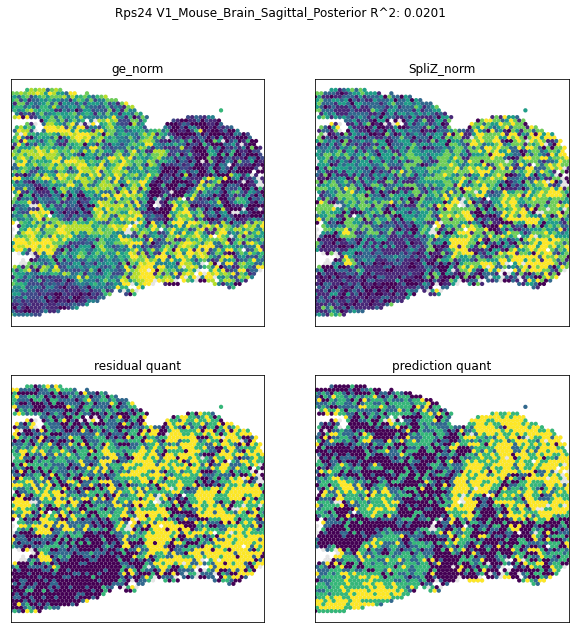

1436

In [46]:
windf.columns

Index(['cell_id', 'chrom', 'read_strand', 'window', 'channel', 'z_scaled',
       'count', 'clust_3', 'barcode', 'in_tissue', 'array_row', 'array_col',
       'xcoord', 'ycoord', 'plot_xcoord', 'plot_ycoord', 'pixval', 'pixquant',
       'num_spots', 'gene_cell', 'frac_count', 'z_scaled_quant',
       'z_scaled_norm', 'frac_count_quant', 'frac_count_norm'],
      dtype='object')

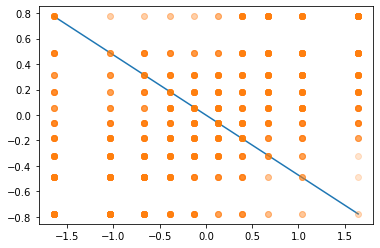

In [51]:
plt.plot(windf["{}_norm".format(srow["col"])],result.intercept + result.slope*windf["{}_norm".format(srow["col"])])
plt.plot(windf["{}_norm".format(srow["col"])],result.intercept + result.slope*windf["{}_norm".format(srow2["col"])],marker="o",linestyle="",alpha=0.1)

plt.show()

In [ ]:
plt.plot(windf["{}_norm"])

In [142]:
outdf = pd.DataFrame.from_dict(out).sort_values("r_squared")
outdf.to_csv("{}{}_{}_{}.tsv".format(outpath,dataname,q,score),sep="\t",index=False)
outdf

gene  num_spots  r_squared
52      Fah        720   0.000000
84     Mdh2        234   0.000000
133   Pmpcb        106   0.000000
189   Rps27       1108   0.000000
180  Rps15a       1371   0.000000
..      ...        ...        ...
69    Hsbp1        207   0.071352
186   Rps24       1409   0.077275
57    Fxyd2       1406   0.085106
38    Cox7c       1392   0.093200
64   Hbb-bt       1332   0.168143

[233 rows x 3 columns]

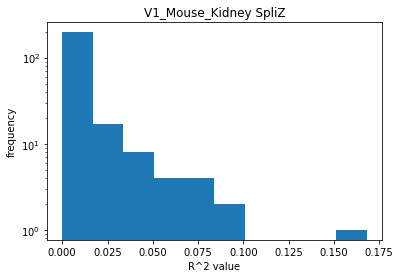

In [143]:
plt.hist(outdf["r_squared"])
plt.yscale("log")
plt.xlabel("R^2 value")
plt.ylabel("frequency")
plt.title("{} {}".format(dataname,score))
plt.savefig("{}{}_{}_{}.png".format(outpath,dataname,q,score))
plt.show()


In [93]:
"'" + "','".join(list(outdf.tail(10)["window"])) + "'" 

"'chr4_3182_plus','chr4_27692_plus','chr2_5643_plus','chr9_20642_minus','chr18_4135_plus','chr8_852_minus','chr18_12198_plus','chr11_20117_minus','chr8_725_minus','chr8_11013_plus'"

In [100]:
"'" + "','".join(list(outdf.head(10)["window"])) + "'" 

"'chr7_4994_minus','chr18_6195_minus','chr5_22885_plus','chr4_8188_minus','chr1_12629_minus','chr1_26211_minus','chr18_7281_minus','chr10_15686_plus','chr2_31079_minus','chr5_27159_plus'"

In [72]:
windf

cell_id  chrom  \
3988      V1_Mouse_Brain_Sagittal_Anterior_AAACACCAATAACTGC  chr10   
19710     V1_Mouse_Brain_Sagittal_Anterior_AAACAGCTTTCAGAAG  chr10   
29219     V1_Mouse_Brain_Sagittal_Anterior_AAACAGGGTCTATATT  chr10   
53479     V1_Mouse_Brain_Sagittal_Anterior_AAACCGGGTAGGTACC  chr10   
65753     V1_Mouse_Brain_Sagittal_Anterior_AAACCTAAGCAGCCGG  chr10   
...                                                     ...    ...   
15992082  V1_Mouse_Brain_Sagittal_Anterior_TTGTGGCCCTGACAGT  chr10   
16013872  V1_Mouse_Brain_Sagittal_Anterior_TTGTGTTTCCCGAAAG  chr10   
16020703  V1_Mouse_Brain_Sagittal_Anterior_TTGTTCAGTGTGCTAC  chr10   
16027486  V1_Mouse_Brain_Sagittal_Anterior_TTGTTGTGTGTCAAGA  chr10   
16033409  V1_Mouse_Brain_Sagittal_Anterior_TTGTTTCACATCCAGG  chr10   

         read_strand            window                           channel  \
3988               -  chr10_1068_minus  V1_Mouse_Brain_Sagittal_Anterior   
19710              -  chr10_1068_minus  V1_Mouse_Brain_Sagittal_Anterior   
29219              -  chr10_1068_minus  V1_Mouse_Brain_Sagittal_Anterior   
53479              -  chr10_1068_minus  V1_Mouse_Brain_Sagittal_Anterior   
65753              -  chr10_1068_minus  V1_Mouse_Brain_Sagittal_Anterior   
...              ...               ...                               ...   
15992082           -  chr10_1068_minus  V1_Mouse_Brain_Sagittal_Anterior   
16013872           -  chr10_1068_minus  V1_Mouse_Brain_Sagittal_Anterior   
16020703           -  chr10_1068_minus  V1_Mouse_Brain_Sagittal_Anterior   
16027486           -  chr10_1068_minus  V1_Mouse_Brain_Sagittal_Anterior   
16033409           -  chr10_1068_minus  V1_Mouse_Brain_Sagittal_Anterior   

          z_scaled  count  clust_3             barcode  in_tissue  ...  \
3988     -0.192450      1      2.0  AAACACCAATAACTGC-1          1  ...   
19710     0.316139      2      2.0  AAACAGCTTTCAGAAG-1          1  ...   
29219    -0.228778      1      2.0  AAACAGGGTCTATATT-1          1  ...   
53479    -0.449772      4      2.0  AAACCGGGTAGGTACC-1          1  ...   
65753    -0.454817      3      1.0  AAACCTAAGCAGCCGG-1          1  ...   
...            ...    ...      ...                 ...        ...  ...   
15992082 -1.136972      1      0.0  TTGTGGCCCTGACAGT-1          1  ...   
16013872 -0.507291      2      2.0  TTGTGTTTCCCGAAAG-1          1  ...   
16020703  0.842891      2      0.0  TTGTTCAGTGTGCTAC-1          1  ...   
16027486 -0.991661      1      0.0  TTGTTGTGTGTCAAGA-1          1  ...   
16033409  0.461450      1      2.0  TTGTTTCACATCCAGG-1          1  ...   

          array_col  xcoord  ycoord  plot_xcoord  plot_ycoord  pixval  \
3988             19    8552    2788         2788        -8552     139   
19710             9    6636    2100         2100        -6636     119   
29219            13    7115    2375         2375        -7115     122   
53479            28    6517    3407         3407        -6517     138   
65753            83    9271    7193         7193        -9271     128   
...             ...     ...     ...          ...          ...     ...   
15992082         60    3642    5610         5610        -3642     140   
16013872         59    7594    5541         5541        -7594     133   
16020703         64    4361    5885         5885        -4361     135   
16027486         77    5199    6780         6780        -5199     129   
16033409         42    8433    4371         4371        -8433     133   

          pixquant  numReads  frac_count  num_spots  
3988             7     26677    0.000037       1563  
19710            0     30967    0.000065       1563  
29219            0     27111    0.000037       1563  
53479            7     22518    0.000178       1563  
65753            0     49001    0.000061       1563  
...            ...       ...         ...        ...  
15992082         7      5080    0.000197       1563  
16013872         2     18930    0.000106       1563  
16020703         4     19172    0.000104      

In [49]:
windf

cell_id chrom read_strand  \
3554      V1_Mouse_Brain_Sagittal_Anterior_AAACAAGTATCTCCCA  chr8           +   
11899     V1_Mouse_Brain_Sagittal_Anterior_AAACACCAATAACTGC  chr8           +   
18947     V1_Mouse_Brain_Sagittal_Anterior_AAACAGAGCGACTCCT  chr8           +   
28191     V1_Mouse_Brain_Sagittal_Anterior_AAACAGCTTTCAGAAG  chr8           +   
37410     V1_Mouse_Brain_Sagittal_Anterior_AAACAGGGTCTATATT  chr8           +   
...                                                     ...   ...         ...   
16019924  V1_Mouse_Brain_Sagittal_Anterior_TTGTGTTTCCCGAAAG  chr8           +   
16026736  V1_Mouse_Brain_Sagittal_Anterior_TTGTTCAGTGTGCTAC  chr8           +   
16032729  V1_Mouse_Brain_Sagittal_Anterior_TTGTTGTGTGTCAAGA  chr8           +   
16036931  V1_Mouse_Brain_Sagittal_Anterior_TTGTTTCACATCCAGG  chr8           +   
16041521  V1_Mouse_Brain_Sagittal_Anterior_TTGTTTCCATACAACT  chr8           +   

                   window                           channel  z_scaled  count  \
3554      chr8_11013_plus  V1_Mouse_Brain_Sagittal_Anterior  0.466788      4   
11899     chr8_11013_plus  V1_Mouse_Brain_Sagittal_Anterior  0.672011     14   
18947     chr8_11013_plus  V1_Mouse_Brain_Sagittal_Anterior -0.177380     25   
28191     chr8_11013_plus  V1_Mouse_Brain_Sagittal_Anterior  0.451609     27   
37410     chr8_11013_plus  V1_Mouse_Brain_Sagittal_Anterior  0.125474     17   
...                   ...                               ...       ...    ...   
16019924  chr8_11013_plus  V1_Mouse_Brain_Sagittal_Anterior -0.179666     20   
16026736  chr8_11013_plus  V1_Mouse_Brain_Sagittal_Anterior -0.055068     31   
16032729  chr8_11013_plus  V1_Mouse_Brain_Sagittal_Anterior -0.534062     15   
16036931  chr8_11013_plus  V1_Mouse_Brain_Sagittal_Anterior -0.430526      6   
16041521  chr8_11013_plus  V1_Mouse_Brain_Sagittal_Anterior  0.065893     14   

          clust_3             barcode  in_tissue  ...  plot_xcoord  \
3554          1.0  AAACAAGTATCTCCCA-1          1  ...         8500   
11899         2.0  AAACACCAATAACTGC-1          1  ...         2788   
18947         0.0  AAACAGAGCGACTCCT-1          1  ...         7950   
28191         2.0  AAACAGCTTTCAGAAG-1          1  ...         2100   
37410         2.0  AAACAGGGTCTATATT-1          1  ...         2375   
...           ...                 ...        ...  ...          ...   
16019924      2.0  TTGTGTTTCCCGAAAG-1          1  ...         5541   
16026736      0.0  TTGTTCAGTGTGCTAC-1          1  ...         5885   
16032729      0.0  TTGTTGTGTGTCAAGA-1          1  ...         6780   
16036931      2.0  TTGTTTCACATCCAGG-1          1  ...         4371   
16041521      2.0  TTGTTTCCATACAACT-1          1  ...         3339   

          plot_ycoord  pixval  pixquant  numReads  frac_count  z_scaled_quant  \
3554            -7474     133         2      8161    0.000490              81   
11899           -8552     139         7     26677    0.000525              89   
18947           -3163     133         2     18391    0.001359              27   
28191           -6636     119         0     30967    0.000872              80   
37410           -7115     122         0     27111    0.000627              59   
...               ...     ...       ...       ...         ...             ...   
16019924        -7594     133         2     18930    0.001057              27   
16026736        -4361     135         4     19172    0.001617              41   
16032729        -5199     129         0     15240    0.000984               4   
16036931        -8433     133         2      7473    0.000803               7   
16041521        -6876     150         9      9058    0.001546              54   

          frac_count_quant  z_scaled_norm  frac_count_norm  
3554                    11       0.896473        -1.200359  
11899                   13       1.253565        -1.103063  
18947                   83      -0.597760         0.974114  
28191                   42       0.859617        -0.189118  

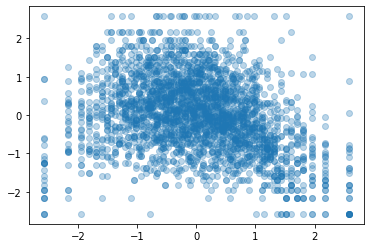

In [56]:
plt.plot(windf["z_scaled_norm"],windf["frac_count_norm"],marker="o",linestyle="",alpha=0.3)
plt.show()

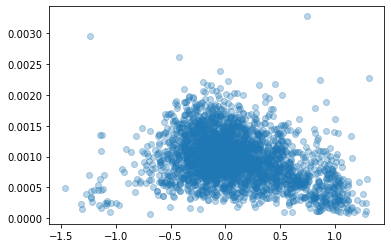

In [64]:
plt.plot(windf["z_scaled"],windf["frac_count"],marker="o",linestyle="",alpha=0.3)
plt.show()

In [59]:
result = linregress(windf["z_scaled_norm"], windf["frac_count_norm"])

In [63]:
result.rvalue**2

0.08244355344113158

In [40]:
windf.sort_values("frac_count_quant")

cell_id chrom read_strand  \
8339667   V1_Mouse_Brain_Sagittal_Anterior_GACGCATACCCGTCGG  chr8           +   
4315268   V1_Mouse_Brain_Sagittal_Anterior_CACCACGCCACACAGA  chr8           +   
12317160  V1_Mouse_Brain_Sagittal_Anterior_TACTTGTTAGTAGTCC  chr8           +   
5411225   V1_Mouse_Brain_Sagittal_Anterior_CCCTATGTAGAGCAGA  chr8           +   
15378122  V1_Mouse_Brain_Sagittal_Anterior_TTCAGCTGGCGTGCCC  chr8           +   
...                                                     ...   ...         ...   
7000501   V1_Mouse_Brain_Sagittal_Anterior_CTACGACTAGCTATAA  chr8           +   
13146384  V1_Mouse_Brain_Sagittal_Anterior_TCATTTAGAAGTGTGA  chr8           +   
6257661   V1_Mouse_Brain_Sagittal_Anterior_CGCAAACACGAGTTAC  chr8           +   
556790    V1_Mouse_Brain_Sagittal_Anterior_AAGATTGGCGGAACGT  chr8           +   
7674887   V1_Mouse_Brain_Sagittal_Anterior_CTTAACTTACAGTATA  chr8           +   

                   window                           channel  z_scaled  count  \
8339667   chr8_11013_plus  V1_Mouse_Brain_Sagittal_Anterior  0.984468      1   
4315268   chr8_11013_plus  V1_Mouse_Brain_Sagittal_Anterior -0.685052      1   
12317160  chr8_11013_plus  V1_Mouse_Brain_Sagittal_Anterior -1.129395      1   
5411225   chr8_11013_plus  V1_Mouse_Brain_Sagittal_Anterior -0.234238      2   
15378122  chr8_11013_plus  V1_Mouse_Brain_Sagittal_Anterior  0.867990      1   
...                   ...                               ...       ...    ...   
7000501   chr8_11013_plus  V1_Mouse_Brain_Sagittal_Anterior -0.205523     32   
13146384  chr8_11013_plus  V1_Mouse_Brain_Sagittal_Anterior  1.308019      1   
6257661   chr8_11013_plus  V1_Mouse_Brain_Sagittal_Anterior -0.185826     18   
556790    chr8_11013_plus  V1_Mouse_Brain_Sagittal_Anterior  0.160232     33   
7674887   chr8_11013_plus  V1_Mouse_Brain_Sagittal_Anterior  0.310289     65   

          clust_3             barcode  in_tissue  ...  plot_xcoord  \
8339667       2.0  GACGCATACCCGTCGG-1          1  ...         1893   
4315268       2.0  CACCACGCCACACAGA-1          1  ...         2031   
12317160      0.0  TACTTGTTAGTAGTCC-1          1  ...         7468   
5411225       2.0  CCCTATGTAGAGCAGA-1          1  ...         3132   
15378122      1.0  TTCAGCTGGCGTGCCC-1          1  ...         8019   
...           ...                 ...        ...  ...          ...   
7000501       2.0  CTACGACTAGCTATAA-1          1  ...         3132   
13146384      1.0  TCATTTAGAAGTGTGA-1          1  ...         9051   
6257661       2.0  CGCAAACACGAGTTAC-1          1  ...         4027   
556790        0.0  AAGATTGGCGGAACGT-1          1  ...         7674   
7674887       1.0  CTTAACTTACAGTATA-1          1  ...         9189   

          plot_ycoord  pixval  pixquant  numReads  frac_count  z_scaled_quant  \
8339667         -9151     157         9      7425    0.000135              96   
4315268         -6277     142         8     13146    0.000076               2   
12317160        -5918     129         0      6208    0.000161               0   
5411225         -8672     142         8     13428    0.000149              21   
15378122        -8073     134         3      7367    0.000136              93   
...               ...     ...       ...       ...         ...             ...   
7000501         -6038     137         6     14504    0.002206              24   
13146384        -7953     128         0       438    0.002283              99   
6257661         -4720     139         7      8796    0.002046              26   
556790          -4600     135         4     16512    0.001999              62   
7674887         -9870     131         1     29980    0.002168              74   

          frac_count_quant  z_scaled_norm  frac_count_norm  
8339667                  0       1.811911        -2.575829  
4315268                  0      -1.959964        -2.575829  
12317160                 0      -2.575829        -2.575829  
5411225                  0      -0.789192        -2.575829  

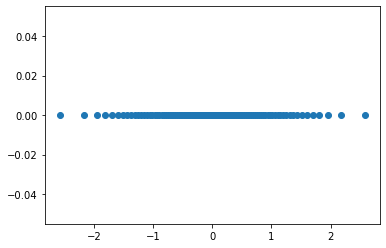

In [45]:
plt.plot(sorted(windf["frac_count_norm"].unique()),[0 for x in range(windf["frac_count_quant"].max() + 1)],marker="o",linestyle="")
plt.show()

In [44]:
range(int(windf["frac_count_norm"].max()) + 1)

range(0, 3)

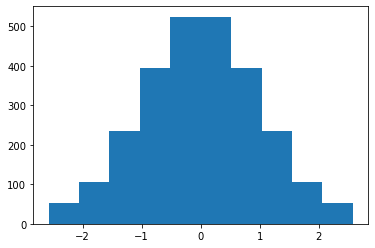

In [48]:
plt.hist(windf["frac_count_norm"],10)
plt.show()

In [ ]:
[x * 0.1 for x in range(num_quant)]

In [6]:
  
# quantile pixvals
temp = df.drop_duplicates("cell_id")[["cell_id","z_scaled"]]

In [10]:

temp
qval = 10
while True:
  try:
    temp["z_scaled_quant"] = pd.qcut(temp['z_scaled'], qval, labels=False)
    break
  except:
    qval -= 1
    print(qval)

In [12]:
temp["z_scaled_quant"].max()

9

In [9]:


# decrease the number of quantiles if necessary (all of the same value don't fit in a bin)
qval = 10
while True:
  try:
    temp["pixquant"] = pd.qcut(temp['pixval'], qval, labels=False)
    break
  except:
    qval -= 1
    print(qval)
temp.index = temp["barcode"]
cer_loc["pixquant"] = cer_loc["barcode"].map(temp["pixquant"])

9
8
7
6
5
4
3
2
1
0
-1
-2
-3
-4
-5
-6
-7
-8
-9
-10
-11
-12
-13
-14
-15
-16
-17
-18
-19
-20
-21
-22
-23
-24
-25
-26
-27
-28
-29
-30
-31
-32
-33
-34
-35
-36
-37
-38
-39
-40
-41
-42
-43
-44
-45
-46
-47
-48
-49
-50
-51
-52
-53
-54
-55
-56
-57
-58
-59
-60
-61
-62
-63
-64
-65
-66
-67
-68
-69
-70
-71
-72
-73
-74
-75
-76
-77
-78
-79
-80
-81
-82
-83
-84
-85
-86
-87
-88
-89
-90
-91
-92
-93
-94
-95
-96
-97
-98
-99
-100
-101
-102
-103
-104
-105
-106
-107
-108
-109
-110
-111
-112
-113
-114
-115
-116
-117
-118
-119
-120
-121
-122
-123
-124
-125
-126
-127
-128
-129
-130
-131
-132
-133
-134
-135
-136
-137
-138
-139
-140
-141
-142
-143
-144
-145
-146
-147
-148
-149
-150
-151
-152
-153
-154
-155
-156
-157
-158
-159
-160
-161
-162
-163
-164
-165
-166
-167
-168
-169
-170
-171
-172
-173
-174
-175
-176
-177
-178
-179
-180
-181
-182
-183
-184
-185
-186
-187
-188
-189
-190
-191
-192
-193
-194
-195
-196
-197
-198
-199
-200
-201
-202
-203
-204
-205
-206
-207
-208
-209
-210
-211
-212
-213
-214
-215
-216
-217
-21

-4358
-4359
-4360
-4361
-4362
-4363
-4364
-4365
-4366
-4367
-4368
-4369
-4370
-4371
-4372
-4373
-4374
-4375
-4376
-4377
-4378
-4379
-4380
-4381
-4382
-4383
-4384
-4385
-4386
-4387
-4388
-4389
-4390
-4391
-4392
-4393
-4394
-4395
-4396
-4397
-4398
-4399
-4400
-4401
-4402
-4403
-4404
-4405
-4406
-4407
-4408
-4409
-4410
-4411
-4412
-4413
-4414
-4415
-4416
-4417
-4418
-4419
-4420
-4421
-4422
-4423
-4424
-4425
-4426
-4427
-4428
-4429
-4430
-4431
-4432
-4433
-4434
-4435
-4436
-4437
-4438
-4439
-4440
-4441
-4442
-4443
-4444
-4445
-4446
-4447
-4448
-4449
-4450
-4451
-4452
-4453
-4454
-4455
-4456
-4457
-4458
-4459
-4460
-4461
-4462
-4463
-4464
-4465
-4466
-4467
-4468
-4469
-4470
-4471
-4472
-4473
-4474
-4475
-4476
-4477
-4478
-4479
-4480
-4481
-4482
-4483
-4484
-4485
-4486
-4487
-4488
-4489
-4490
-4491
-4492
-4493
-4494
-4495
-4496
-4497
-4498
-4499
-4500
-4501
-4502
-4503
-4504
-4505
-4506
-4507
-4508
-4509
-4510
-4511
-4512
-4513
-4514
-4515
-4516
-4517
-4518
-4519
-4520
-4521
-4522
-4523
-452

-9357
-9358
-9359
-9360
-9361
-9362
-9363
-9364
-9365
-9366
-9367
-9368
-9369
-9370
-9371
-9372
-9373
-9374
-9375
-9376
-9377
-9378
-9379
-9380
-9381
-9382
-9383
-9384
-9385
-9386
-9387
-9388
-9389
-9390
-9391
-9392
-9393
-9394
-9395
-9396
-9397
-9398
-9399
-9400
-9401
-9402
-9403
-9404
-9405
-9406
-9407
-9408
-9409
-9410
-9411
-9412
-9413
-9414
-9415
-9416
-9417
-9418
-9419
-9420
-9421
-9422
-9423
-9424
-9425
-9426
-9427
-9428
-9429
-9430
-9431
-9432
-9433
-9434
-9435
-9436
-9437
-9438
-9439
-9440
-9441
-9442
-9443
-9444
-9445
-9446
-9447
-9448
-9449
-9450
-9451
-9452
-9453
-9454
-9455
-9456
-9457
-9458
-9459
-9460
-9461
-9462
-9463
-9464
-9465
-9466
-9467
-9468
-9469
-9470
-9471
-9472
-9473
-9474
-9475
-9476
-9477
-9478
-9479
-9480
-9481
-9482
-9483
-9484
-9485
-9486
-9487
-9488
-9489
-9490
-9491
-9492
-9493
-9494
-9495
-9496
-9497
-9498
-9499
-9500
-9501
-9502
-9503
-9504
-9505
-9506
-9507
-9508
-9509
-9510
-9511
-9512
-9513
-9514
-9515
-9516
-9517
-9518
-9519
-9520
-9521
-9522
-952

-13857
-13858
-13859
-13860
-13861
-13862
-13863
-13864
-13865
-13866
-13867
-13868
-13869
-13870
-13871
-13872
-13873
-13874
-13875
-13876
-13877
-13878
-13879
-13880
-13881
-13882
-13883
-13884
-13885
-13886
-13887
-13888
-13889
-13890
-13891
-13892
-13893
-13894
-13895
-13896
-13897
-13898
-13899
-13900
-13901
-13902
-13903
-13904
-13905
-13906
-13907
-13908
-13909
-13910
-13911
-13912
-13913
-13914
-13915
-13916
-13917
-13918
-13919
-13920
-13921
-13922
-13923
-13924
-13925
-13926
-13927
-13928
-13929
-13930
-13931
-13932
-13933
-13934
-13935
-13936
-13937
-13938
-13939
-13940
-13941
-13942
-13943
-13944
-13945
-13946
-13947
-13948
-13949
-13950
-13951
-13952
-13953
-13954
-13955
-13956
-13957
-13958
-13959
-13960
-13961
-13962
-13963
-13964
-13965
-13966
-13967
-13968
-13969
-13970
-13971
-13972
-13973
-13974
-13975
-13976
-13977
-13978
-13979
-13980
-13981
-13982
-13983
-13984
-13985
-13986
-13987
-13988
-13989
-13990
-13991
-13992
-13993
-13994
-13995
-13996
-13997
-13998
-13999

-17856
-17857
-17858
-17859
-17860
-17861
-17862
-17863
-17864
-17865
-17866
-17867
-17868
-17869
-17870
-17871
-17872
-17873
-17874
-17875
-17876
-17877
-17878
-17879
-17880
-17881
-17882
-17883
-17884
-17885
-17886
-17887
-17888
-17889
-17890
-17891
-17892
-17893
-17894
-17895
-17896
-17897
-17898
-17899
-17900
-17901
-17902
-17903
-17904
-17905
-17906
-17907
-17908
-17909
-17910
-17911
-17912
-17913
-17914
-17915
-17916
-17917
-17918
-17919
-17920
-17921
-17922
-17923
-17924
-17925
-17926
-17927
-17928
-17929
-17930
-17931
-17932
-17933
-17934
-17935
-17936
-17937
-17938
-17939
-17940
-17941
-17942
-17943
-17944
-17945
-17946
-17947
-17948
-17949
-17950
-17951
-17952
-17953
-17954
-17955
-17956
-17957
-17958
-17959
-17960
-17961
-17962
-17963
-17964
-17965
-17966
-17967
-17968
-17969
-17970
-17971
-17972
-17973
-17974
-17975
-17976
-17977
-17978
-17979
-17980
-17981
-17982
-17983
-17984
-17985
-17986
-17987
-17988
-17989
-17990
-17991
-17992
-17993
-17994
-17995
-17996
-17997
-17998

-22856
-22857
-22858
-22859
-22860
-22861
-22862
-22863
-22864
-22865
-22866
-22867
-22868
-22869
-22870
-22871
-22872
-22873
-22874
-22875
-22876
-22877
-22878
-22879
-22880
-22881
-22882
-22883
-22884
-22885
-22886
-22887
-22888
-22889
-22890
-22891
-22892
-22893
-22894
-22895
-22896
-22897
-22898
-22899
-22900
-22901
-22902
-22903
-22904
-22905
-22906
-22907
-22908
-22909
-22910
-22911
-22912
-22913
-22914
-22915
-22916
-22917
-22918
-22919
-22920
-22921
-22922
-22923
-22924
-22925
-22926
-22927
-22928
-22929
-22930
-22931
-22932
-22933
-22934
-22935
-22936
-22937
-22938
-22939
-22940
-22941
-22942
-22943
-22944
-22945
-22946
-22947
-22948
-22949
-22950
-22951
-22952
-22953
-22954
-22955
-22956
-22957
-22958
-22959
-22960
-22961
-22962
-22963
-22964
-22965
-22966
-22967
-22968
-22969
-22970
-22971
-22972
-22973
-22974
-22975
-22976
-22977
-22978
-22979
-22980
-22981
-22982
-22983
-22984
-22985
-22986
-22987
-22988
-22989
-22990
-22991
-22992
-22993
-22994
-22995
-22996
-22997
-22998

-27855
-27856
-27857
-27858
-27859
-27860
-27861
-27862
-27863
-27864
-27865
-27866
-27867
-27868
-27869
-27870
-27871
-27872
-27873
-27874
-27875
-27876
-27877
-27878
-27879
-27880
-27881
-27882
-27883
-27884
-27885
-27886
-27887
-27888
-27889
-27890
-27891
-27892
-27893
-27894
-27895
-27896
-27897
-27898
-27899
-27900
-27901
-27902
-27903
-27904
-27905
-27906
-27907
-27908
-27909
-27910
-27911
-27912
-27913
-27914
-27915
-27916
-27917
-27918
-27919
-27920
-27921
-27922
-27923
-27924
-27925
-27926
-27927
-27928
-27929
-27930
-27931
-27932
-27933
-27934
-27935
-27936
-27937
-27938
-27939
-27940
-27941
-27942
-27943
-27944
-27945
-27946
-27947
-27948
-27949
-27950
-27951
-27952
-27953
-27954
-27955
-27956
-27957
-27958
-27959
-27960
-27961
-27962
-27963
-27964
-27965
-27966
-27967
-27968
-27969
-27970
-27971
-27972
-27973
-27974
-27975
-27976
-27977
-27978
-27979
-27980
-27981
-27982
-27983
-27984
-27985
-27986
-27987
-27988
-27989
-27990
-27991
-27992
-27993
-27994
-27995
-27996
-27997

-32855
-32856
-32857
-32858
-32859
-32860
-32861
-32862
-32863
-32864
-32865
-32866
-32867
-32868
-32869
-32870
-32871
-32872
-32873
-32874
-32875
-32876
-32877
-32878
-32879
-32880
-32881
-32882
-32883
-32884
-32885
-32886
-32887
-32888
-32889
-32890
-32891
-32892
-32893
-32894
-32895
-32896
-32897
-32898
-32899
-32900
-32901
-32902
-32903
-32904
-32905
-32906
-32907
-32908
-32909
-32910
-32911
-32912
-32913
-32914
-32915
-32916
-32917
-32918
-32919
-32920
-32921
-32922
-32923
-32924
-32925
-32926
-32927
-32928
-32929
-32930
-32931
-32932
-32933
-32934
-32935
-32936
-32937
-32938
-32939
-32940
-32941
-32942
-32943
-32944
-32945
-32946
-32947
-32948
-32949
-32950
-32951
-32952
-32953
-32954
-32955
-32956
-32957
-32958
-32959
-32960
-32961
-32962
-32963
-32964
-32965
-32966
-32967
-32968
-32969
-32970
-32971
-32972
-32973
-32974
-32975
-32976
-32977
-32978
-32979
-32980
-32981
-32982
-32983
-32984
-32985
-32986
-32987
-32988
-32989
-32990
-32991
-32992
-32993
-32994
-32995
-32996
-32997

-37354
-37355
-37356
-37357
-37358
-37359
-37360
-37361
-37362
-37363
-37364
-37365
-37366
-37367
-37368
-37369
-37370
-37371
-37372
-37373
-37374
-37375
-37376
-37377
-37378
-37379
-37380
-37381
-37382
-37383
-37384
-37385
-37386
-37387
-37388
-37389
-37390
-37391
-37392
-37393
-37394
-37395
-37396
-37397
-37398
-37399
-37400
-37401
-37402
-37403
-37404
-37405
-37406
-37407
-37408
-37409
-37410
-37411
-37412
-37413
-37414
-37415
-37416
-37417
-37418
-37419
-37420
-37421
-37422
-37423
-37424
-37425
-37426
-37427
-37428
-37429
-37430
-37431
-37432
-37433
-37434
-37435
-37436
-37437
-37438
-37439
-37440
-37441
-37442
-37443
-37444
-37445
-37446
-37447
-37448
-37449
-37450
-37451
-37452
-37453
-37454
-37455
-37456
-37457
-37458
-37459
-37460
-37461
-37462
-37463
-37464
-37465
-37466
-37467
-37468
-37469
-37470
-37471
-37472
-37473
-37474
-37475
-37476
-37477
-37478
-37479
-37480
-37481
-37482
-37483
-37484
-37485
-37486
-37487
-37488
-37489
-37490
-37491
-37492
-37493
-37494
-37495
-37496

-42354
-42355
-42356
-42357
-42358
-42359
-42360
-42361
-42362
-42363
-42364
-42365
-42366
-42367
-42368
-42369
-42370
-42371
-42372
-42373
-42374
-42375
-42376
-42377
-42378
-42379
-42380
-42381
-42382
-42383
-42384
-42385
-42386
-42387
-42388
-42389
-42390
-42391
-42392
-42393
-42394
-42395
-42396
-42397
-42398
-42399
-42400
-42401
-42402
-42403
-42404
-42405
-42406
-42407
-42408
-42409
-42410
-42411
-42412
-42413
-42414
-42415
-42416
-42417
-42418
-42419
-42420
-42421
-42422
-42423
-42424
-42425
-42426
-42427
-42428
-42429
-42430
-42431
-42432
-42433
-42434
-42435
-42436
-42437
-42438
-42439
-42440
-42441
-42442
-42443
-42444
-42445
-42446
-42447
-42448
-42449
-42450
-42451
-42452
-42453
-42454
-42455
-42456
-42457
-42458
-42459
-42460
-42461
-42462
-42463
-42464
-42465
-42466
-42467
-42468
-42469
-42470
-42471
-42472
-42473
-42474
-42475
-42476
-42477
-42478
-42479
-42480
-42481
-42482
-42483
-42484
-42485
-42486
-42487
-42488
-42489
-42490
-42491
-42492
-42493
-42494
-42495
-42496

-47353
-47354
-47355
-47356
-47357
-47358
-47359
-47360
-47361
-47362
-47363
-47364
-47365
-47366
-47367
-47368
-47369
-47370
-47371
-47372
-47373
-47374
-47375
-47376
-47377
-47378
-47379
-47380
-47381
-47382
-47383
-47384
-47385
-47386
-47387
-47388
-47389
-47390
-47391
-47392
-47393
-47394
-47395
-47396
-47397
-47398
-47399
-47400
-47401
-47402
-47403
-47404
-47405
-47406
-47407
-47408
-47409
-47410
-47411
-47412
-47413
-47414
-47415
-47416
-47417
-47418
-47419
-47420
-47421
-47422
-47423
-47424
-47425
-47426
-47427
-47428
-47429
-47430
-47431
-47432
-47433
-47434
-47435
-47436
-47437
-47438
-47439
-47440
-47441
-47442
-47443
-47444
-47445
-47446
-47447
-47448
-47449
-47450
-47451
-47452
-47453
-47454
-47455
-47456
-47457
-47458
-47459
-47460
-47461
-47462
-47463
-47464
-47465
-47466
-47467
-47468
-47469
-47470
-47471
-47472
-47473
-47474
-47475
-47476
-47477
-47478
-47479
-47480
-47481
-47482
-47483
-47484
-47485
-47486
-47487
-47488
-47489
-47490
-47491
-47492
-47493
-47494
-47495

-51853
-51854
-51855
-51856
-51857
-51858
-51859
-51860
-51861
-51862
-51863
-51864
-51865
-51866
-51867
-51868
-51869
-51870
-51871
-51872
-51873
-51874
-51875
-51876
-51877
-51878
-51879
-51880
-51881
-51882
-51883
-51884
-51885
-51886
-51887
-51888
-51889
-51890
-51891
-51892
-51893
-51894
-51895
-51896
-51897
-51898
-51899
-51900
-51901
-51902
-51903
-51904
-51905
-51906
-51907
-51908
-51909
-51910
-51911
-51912
-51913
-51914
-51915
-51916
-51917
-51918
-51919
-51920
-51921
-51922
-51923
-51924
-51925
-51926
-51927
-51928
-51929
-51930
-51931
-51932
-51933
-51934
-51935
-51936
-51937
-51938
-51939
-51940
-51941
-51942
-51943
-51944
-51945
-51946
-51947
-51948
-51949
-51950
-51951
-51952
-51953
-51954
-51955
-51956
-51957
-51958
-51959
-51960
-51961
-51962
-51963
-51964
-51965
-51966
-51967
-51968
-51969
-51970
-51971
-51972
-51973
-51974
-51975
-51976
-51977
-51978
-51979
-51980
-51981
-51982
-51983
-51984
-51985
-51986
-51987
-51988
-51989
-51990
-51991
-51992
-51993
-51994
-51995

-56852
-56853
-56854
-56855
-56856
-56857
-56858
-56859
-56860
-56861
-56862
-56863
-56864
-56865
-56866
-56867
-56868
-56869
-56870
-56871
-56872
-56873
-56874
-56875
-56876
-56877
-56878
-56879
-56880
-56881
-56882
-56883
-56884
-56885
-56886
-56887
-56888
-56889
-56890
-56891
-56892
-56893
-56894
-56895
-56896
-56897
-56898
-56899
-56900
-56901
-56902
-56903
-56904
-56905
-56906
-56907
-56908
-56909
-56910
-56911
-56912
-56913
-56914
-56915
-56916
-56917
-56918
-56919
-56920
-56921
-56922
-56923
-56924
-56925
-56926
-56927
-56928
-56929
-56930
-56931
-56932
-56933
-56934
-56935
-56936
-56937
-56938
-56939
-56940
-56941
-56942
-56943
-56944
-56945
-56946
-56947
-56948
-56949
-56950
-56951
-56952
-56953
-56954
-56955
-56956
-56957
-56958
-56959
-56960
-56961
-56962
-56963
-56964
-56965
-56966
-56967
-56968
-56969
-56970
-56971
-56972
-56973
-56974
-56975
-56976
-56977
-56978
-56979
-56980
-56981
-56982
-56983
-56984
-56985
-56986
-56987
-56988
-56989
-56990
-56991
-56992
-56993
-56994

-61852
-61853
-61854
-61855
-61856
-61857
-61858
-61859
-61860
-61861
-61862
-61863
-61864
-61865
-61866
-61867
-61868
-61869
-61870
-61871
-61872
-61873
-61874
-61875
-61876
-61877
-61878
-61879
-61880
-61881
-61882
-61883
-61884
-61885
-61886
-61887
-61888
-61889
-61890
-61891
-61892
-61893
-61894
-61895
-61896
-61897
-61898
-61899
-61900
-61901
-61902
-61903
-61904
-61905
-61906
-61907
-61908
-61909
-61910
-61911
-61912
-61913
-61914
-61915
-61916
-61917
-61918
-61919
-61920
-61921
-61922
-61923
-61924
-61925
-61926
-61927
-61928
-61929
-61930
-61931
-61932
-61933
-61934
-61935
-61936
-61937
-61938
-61939
-61940
-61941
-61942
-61943
-61944
-61945
-61946
-61947
-61948
-61949
-61950
-61951
-61952
-61953
-61954
-61955
-61956
-61957
-61958
-61959
-61960
-61961
-61962
-61963
-61964
-61965
-61966
-61967
-61968
-61969
-61970
-61971
-61972
-61973
-61974
-61975
-61976
-61977
-61978
-61979
-61980
-61981
-61982
-61983
-61984
-61985
-61986
-61987
-61988
-61989
-61990
-61991
-61992
-61993
-61994

-65966
-65967
-65968
-65969
-65970
-65971
-65972
-65973
-65974
-65975
-65976
-65977
-65978
-65979
-65980
-65981
-65982
-65983
-65984
-65985
-65986
-65987
-65988
-65989
-65990
-65991
-65992
-65993
-65994
-65995
-65996
-65997
-65998
-65999
-66000
-66001
-66002
-66003
-66004
-66005
-66006
-66007
-66008
-66009
-66010
-66011
-66012
-66013
-66014
-66015
-66016
-66017
-66018
-66019
-66020
-66021
-66022
-66023
-66024
-66025
-66026
-66027
-66028
-66029
-66030
-66031
-66032
-66033
-66034
-66035
-66036
-66037
-66038
-66039
-66040
-66041
-66042
-66043
-66044
-66045
-66046
-66047
-66048
-66049
-66050
-66051
-66052
-66053
-66054
-66055
-66056
-66057
-66058
-66059
-66060
-66061
-66062
-66063
-66064
-66065
-66066
-66067
-66068
-66069
-66070
-66071
-66072
-66073
-66074
-66075
-66076
-66077
-66078
-66079
-66080
-66081
-66082
-66083
-66084
-66085
-66086
-66087
-66088
-66089
-66090
-66091
-66092
-66093
-66094
-66095
-66096
-66097
-66098
-66099
-66100
-66101
-66102
-66103
-66104
-66105
-66106
-66107
-66108

-70851
-70852
-70853
-70854
-70855
-70856
-70857
-70858
-70859
-70860
-70861
-70862
-70863
-70864
-70865
-70866
-70867
-70868
-70869
-70870
-70871
-70872
-70873
-70874
-70875
-70876
-70877
-70878
-70879
-70880
-70881
-70882
-70883
-70884
-70885
-70886
-70887
-70888
-70889
-70890
-70891
-70892
-70893
-70894
-70895
-70896
-70897
-70898
-70899
-70900
-70901
-70902
-70903
-70904
-70905
-70906
-70907
-70908
-70909
-70910
-70911
-70912
-70913
-70914
-70915
-70916
-70917
-70918
-70919
-70920
-70921
-70922
-70923
-70924
-70925
-70926
-70927
-70928
-70929
-70930
-70931
-70932
-70933
-70934
-70935
-70936
-70937
-70938
-70939
-70940
-70941
-70942
-70943
-70944
-70945
-70946
-70947
-70948
-70949
-70950
-70951
-70952
-70953
-70954
-70955
-70956
-70957
-70958
-70959
-70960
-70961
-70962
-70963
-70964
-70965
-70966
-70967
-70968
-70969
-70970
-70971
-70972
-70973
-70974
-70975
-70976
-70977
-70978
-70979
-70980
-70981
-70982
-70983
-70984
-70985
-70986
-70987
-70988
-70989
-70990
-70991
-70992
-70993

-75850
-75851
-75852
-75853
-75854
-75855
-75856
-75857
-75858
-75859
-75860
-75861
-75862
-75863
-75864
-75865
-75866
-75867
-75868
-75869
-75870
-75871
-75872
-75873
-75874
-75875
-75876
-75877
-75878
-75879
-75880
-75881
-75882
-75883
-75884
-75885
-75886
-75887
-75888
-75889
-75890
-75891
-75892
-75893
-75894
-75895
-75896
-75897
-75898
-75899
-75900
-75901
-75902
-75903
-75904
-75905
-75906
-75907
-75908
-75909
-75910
-75911
-75912
-75913
-75914
-75915
-75916
-75917
-75918
-75919
-75920
-75921
-75922
-75923
-75924
-75925
-75926
-75927
-75928
-75929
-75930
-75931
-75932
-75933
-75934
-75935
-75936
-75937
-75938
-75939
-75940
-75941
-75942
-75943
-75944
-75945
-75946
-75947
-75948
-75949
-75950
-75951
-75952
-75953
-75954
-75955
-75956
-75957
-75958
-75959
-75960
-75961
-75962
-75963
-75964
-75965
-75966
-75967
-75968
-75969
-75970
-75971
-75972
-75973
-75974
-75975
-75976
-75977
-75978
-75979
-75980
-75981
-75982
-75983
-75984
-75985
-75986
-75987
-75988
-75989
-75990
-75991
-75992

-80850
-80851
-80852
-80853
-80854
-80855
-80856
-80857
-80858
-80859
-80860
-80861
-80862
-80863
-80864
-80865
-80866
-80867
-80868
-80869
-80870
-80871
-80872
-80873
-80874
-80875
-80876
-80877
-80878
-80879
-80880
-80881
-80882
-80883
-80884
-80885
-80886
-80887
-80888
-80889
-80890
-80891
-80892
-80893
-80894
-80895
-80896
-80897
-80898
-80899
-80900
-80901
-80902
-80903
-80904
-80905
-80906
-80907
-80908
-80909
-80910
-80911
-80912
-80913
-80914
-80915
-80916
-80917
-80918
-80919
-80920
-80921
-80922
-80923
-80924
-80925
-80926
-80927
-80928
-80929
-80930
-80931
-80932
-80933
-80934
-80935
-80936
-80937
-80938
-80939
-80940
-80941
-80942
-80943
-80944
-80945
-80946
-80947
-80948
-80949
-80950
-80951
-80952
-80953
-80954
-80955
-80956
-80957
-80958
-80959
-80960
-80961
-80962
-80963
-80964
-80965
-80966
-80967
-80968
-80969
-80970
-80971
-80972
-80973
-80974
-80975
-80976
-80977
-80978
-80979
-80980
-80981
-80982
-80983
-80984
-80985
-80986
-80987
-80988
-80989
-80990
-80991
-80992

-85349
-85350
-85351
-85352
-85353
-85354
-85355
-85356
-85357
-85358
-85359
-85360
-85361
-85362
-85363
-85364
-85365
-85366
-85367
-85368
-85369
-85370
-85371
-85372
-85373
-85374
-85375
-85376
-85377
-85378
-85379
-85380
-85381
-85382
-85383
-85384
-85385
-85386
-85387
-85388
-85389
-85390
-85391
-85392
-85393
-85394
-85395
-85396
-85397
-85398
-85399
-85400
-85401
-85402
-85403
-85404
-85405
-85406
-85407
-85408
-85409
-85410
-85411
-85412
-85413
-85414
-85415
-85416
-85417
-85418
-85419
-85420
-85421
-85422
-85423
-85424
-85425
-85426
-85427
-85428
-85429
-85430
-85431
-85432
-85433
-85434
-85435
-85436
-85437
-85438
-85439
-85440
-85441
-85442
-85443
-85444
-85445
-85446
-85447
-85448
-85449
-85450
-85451
-85452
-85453
-85454
-85455
-85456
-85457
-85458
-85459
-85460
-85461
-85462
-85463
-85464
-85465
-85466
-85467
-85468
-85469
-85470
-85471
-85472
-85473
-85474
-85475
-85476
-85477
-85478
-85479
-85480
-85481
-85482
-85483
-85484
-85485
-85486
-85487
-85488
-85489
-85490
-85491

-90349
-90350
-90351
-90352
-90353
-90354
-90355
-90356
-90357
-90358
-90359
-90360
-90361
-90362
-90363
-90364
-90365
-90366
-90367
-90368
-90369
-90370
-90371
-90372
-90373
-90374
-90375
-90376
-90377
-90378
-90379
-90380
-90381
-90382
-90383
-90384
-90385
-90386
-90387
-90388
-90389
-90390
-90391
-90392
-90393
-90394
-90395
-90396
-90397
-90398
-90399
-90400
-90401
-90402
-90403
-90404
-90405
-90406
-90407
-90408
-90409
-90410
-90411
-90412
-90413
-90414
-90415
-90416
-90417
-90418
-90419
-90420
-90421
-90422
-90423
-90424
-90425
-90426
-90427
-90428
-90429
-90430
-90431
-90432
-90433
-90434
-90435
-90436
-90437
-90438
-90439
-90440
-90441
-90442
-90443
-90444
-90445
-90446
-90447
-90448
-90449
-90450
-90451
-90452
-90453
-90454
-90455
-90456
-90457
-90458
-90459
-90460
-90461
-90462
-90463
-90464
-90465
-90466
-90467
-90468
-90469
-90470
-90471
-90472
-90473
-90474
-90475
-90476
-90477
-90478
-90479
-90480
-90481
-90482
-90483
-90484
-90485
-90486
-90487
-90488
-90489
-90490
-90491

-95348
-95349
-95350
-95351
-95352
-95353
-95354
-95355
-95356
-95357
-95358
-95359
-95360
-95361
-95362
-95363
-95364
-95365
-95366
-95367
-95368
-95369
-95370
-95371
-95372
-95373
-95374
-95375
-95376
-95377
-95378
-95379
-95380
-95381
-95382
-95383
-95384
-95385
-95386
-95387
-95388
-95389
-95390
-95391
-95392
-95393
-95394
-95395
-95396
-95397
-95398
-95399
-95400
-95401
-95402
-95403
-95404
-95405
-95406
-95407
-95408
-95409
-95410
-95411
-95412
-95413
-95414
-95415
-95416
-95417
-95418
-95419
-95420
-95421
-95422
-95423
-95424
-95425
-95426
-95427
-95428
-95429
-95430
-95431
-95432
-95433
-95434
-95435
-95436
-95437
-95438
-95439
-95440
-95441
-95442
-95443
-95444
-95445
-95446
-95447
-95448
-95449
-95450
-95451
-95452
-95453
-95454
-95455
-95456
-95457
-95458
-95459
-95460
-95461
-95462
-95463
-95464
-95465
-95466
-95467
-95468
-95469
-95470
-95471
-95472
-95473
-95474
-95475
-95476
-95477
-95478
-95479
-95480
-95481
-95482
-95483
-95484
-95485
-95486
-95487
-95488
-95489
-95490

-99839
-99840
-99841
-99842
-99843
-99844
-99845
-99846
-99847
-99848
-99849
-99850
-99851
-99852
-99853
-99854
-99855
-99856
-99857
-99858
-99859
-99860
-99861
-99862
-99863
-99864
-99865
-99866
-99867
-99868
-99869
-99870
-99871
-99872
-99873
-99874
-99875
-99876
-99877
-99878
-99879
-99880
-99881
-99882
-99883
-99884
-99885
-99886
-99887
-99888
-99889
-99890
-99891
-99892
-99893
-99894
-99895
-99896
-99897
-99898
-99899
-99900
-99901
-99902
-99903
-99904
-99905
-99906
-99907
-99908
-99909
-99910
-99911
-99912
-99913
-99914
-99915
-99916
-99917
-99918
-99919
-99920
-99921
-99922
-99923
-99924
-99925
-99926
-99927
-99928
-99929
-99930
-99931
-99932
-99933
-99934
-99935
-99936
-99937
-99938
-99939
-99940
-99941
-99942
-99943
-99944
-99945
-99946
-99947
-99948
-99949
-99950
-99951
-99952
-99953
-99954
-99955
-99956
-99957
-99958
-99959
-99960
-99961
-99962
-99963
-99964
-99965
-99966
-99967
-99968
-99969
-99970
-99971
-99972
-99973
-99974
-99975
-99976
-99977
-99978
-99979
-99980
-99981

KeyboardInterrupt: 